### Introduction



### 1. Business Understanding

The fictional real estate investment firm is seeking to identify the top five zip codes for potential investment opportunities. The firm aims to maximize their return on investment by strategically selecting zip codes that exhibit strong growth potential and promising real estate market conditions. By leveraging data from Zillow Research, the firm intends to make data-driven investment decisions and optimize their investment portfolio.

The investment firm needs to determine the top five zip codes that present the best investment opportunities based on real estate market trends and historical data. They require a comprehensive analysis of various factors, such as past price trends, growth rates, market demand, and other relevant indicators to identify zip codes with the highest potential for future price appreciation.

### 2. Objectives
 main objective:
 - The main objective is to develop a forecasting model that can accurately predict real estate price movements in different zip codes and assist in identifying the most favorable locations for investment.

specific objectives:
- To do exploratory data analysis on the data
- To Utilize time series analysis techniques to identify underlying patterns, trends, and seasonality in the real estate price data
- To Build a predictive model that can forecast real estate prices for various zip codes
- To Evaluate the forecasting model's performance by comparing its predictions against actual real estate prices

# Success Metrics.
#### *For the success creterion we will use the *" Root mean squared  error "* and measure accuracy of our models. We shall be aiming at an RMSE value of between 0.2 and 0.5.*
*_This indicates that we  want the predictions to be reasonably close to the actual values, with an acceptable level of error._*

*_During the model training and evaluation process, you will calculate the RMSE for each model and compare it to your target range. Here's how we would interpret the results:_*

*_If the RMSE is below 0.2: This indicates excellent performance, as the predictions have a very small average error compared to the actual values. It suggests that our  model is accurate and reliable._*

*_If the RMSE is between 0.2 and 0.5: This falls within our  target range and suggests that our model is performing well. It means that, on average, the predictions are within a reasonable distance from the actual values._*

*_If the RMSE is above 0.5: This suggests that your model's performance may not be satisfactory. The predictions have a relatively larger average error compared to the actual values. We may need to further improve your model or explore alternative approaches to achieve better accuracy._*


### 2. Data Understanding

The dataset used in this project consists of historic median house prices from various regions in the USA. It covers a time period of 22 years, specifically from April 1996 to April 2018. The dataset was obtained from the [Zillow website.](https://www.zillow.com/research/data/)

Here are the key details about the dataset:

* It contains 14,723 rows and 272 columns.
* Out of the 272 columns, 4 columns are categorical, while the rest are numerical.

The columns are described as follows:
> RegionID: A unique identifier for each region.

> RegionName: The names of the regions, represented by zip codes.

> City: The corresponding city names for each region.

> State: The names of the states where the regions are located.

> Metro: The names of the metropolitan areas associated with the regions.

> County Name: The names of the counties where the regions are situated.

> Size Rank: The ranking of the zip codes based on urbanization.

> Date Columns (265 Columns): These columns represent different dates and provide median house prices for each region over the years.

### 3. Data Preparation

In [1]:
# importing the Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
# Previewing the dataset.
df = pd.read_csv('/content/zillow_data.csv')
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


In [3]:
# A function to analyze the shape, number of columns, and information of the dataset
def analyze_dataset(df):
    """
    This function  outputs information about the shape,
    columns, and information of the dataset using the Pandas library.
    """
    # Output the shape of the dataset
    print("Shape of dataset:", df.shape)
    print('\n-----------------------------------------------------------')

    # Output the column names of the dataset
    print("Column names:", list(df.columns))
    print('\n-----------------------------------------------------------')

    # Output information about the dataset
    print(df.info())
    print('\n-----------------------------------------------------------')

    # output descriptive statistics about the dataset
    print(df.describe())
    print('\n-----------------------------------------------------------')



In [4]:
analyze_dataset(df)

Shape of dataset: (14723, 272)

-----------------------------------------------------------
Column names: ['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank', '1996-04', '1996-05', '1996-06', '1996-07', '1996-08', '1996-09', '1996-10', '1996-11', '1996-12', '1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06', '1997-07', '1997-08', '1997-09', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '

The dataset has 14723 rows and 272 columns,4 categorical and the rest are numerical

In [5]:
#Checking for duplicates and missing data
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

In [6]:
cleaning(df)

"There are '157934' missing values and '0' duplicated values in the dataset"

In [7]:
# Creating a dataframe to display datatypes and, the unique values.
desc = []
for i in df.columns:
    desc.append([
        i,
        df[i].dtypes,
        df[i].nunique(),
    ])

pd.DataFrame(data = desc, columns=['Feature','Dtypes','Sample_Unique'])


,Feature,Dtypes,Sample_Unique
0,RegionID,int64,14723
1,RegionName,int64,14723
2,City,object,7554
3,State,object,51
4,Metro,object,701
...,...,...,...
267,2017-12,int64,5248
268,2018-01,int64,5276
269,2018-02,int64,5303
270,2018-03,int64,5332


In [8]:
def missing_values_percentage(df):
    total_missing = df.isnull().sum().sum()
    total_cells = df.size
    percentage_missing = (total_missing / total_cells) * 100
    return percentage_missing

missing_values_percentage(df)

3.943759463983923

The missing values are 3.94% of the entire dataset.Let's preview the percentage of the missing values per column.

In [9]:
missing_values = df.isnull().mean() * 100

# Print the list of columns in the DataFrame along with their missing percentages
for column in missing_values.index:
    print(column, missing_values[column])

RegionID 0.0
RegionName 0.0
City 0.0
State 0.0
Metro 7.084154044691979
CountyName 0.0
SizeRank 0.0
1996-04 7.056985668681655
1996-05 7.056985668681655
1996-06 7.056985668681655
1996-07 7.056985668681655
1996-08 7.056985668681655
1996-09 7.056985668681655
1996-10 7.056985668681655
1996-11 7.056985668681655
1996-12 7.056985668681655
1997-01 7.056985668681655
1997-02 7.056985668681655
1997-03 7.056985668681655
1997-04 7.056985668681655
1997-05 7.056985668681655
1997-06 7.056985668681655
1997-07 7.050193574679074
1997-08 7.050193574679074
1997-09 7.050193574679074
1997-10 7.050193574679074
1997-11 7.050193574679074
1997-12 7.050193574679074
1998-01 7.036609386673912
1998-02 7.036609386673912
1998-03 7.036609386673912
1998-04 7.036609386673912
1998-05 7.036609386673912
1998-06 7.036609386673912
1998-07 7.036609386673912
1998-08 7.036609386673912
1998-09 7.036609386673912
1998-10 7.036609386673912
1998-11 7.036609386673912
1998-12 7.036609386673912
1999-01 7.036609386673912
1999-02 7.0366093

The percentage of the missing values per column is still low ranging from 1%-7% thus dropping the rows with the missing values won't lead to loss of information.

In [10]:
# Dropping the missing values.
df.dropna(inplace=True)
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14716,99032,97028,Rhododendron,OR,Portland,Clackamas,14717,136200.0,136600.0,136800.0,...,332600,332900,335600,338900,340500,341000,342300,345000,348000,349300
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400


In [11]:
print(missing_values_percentage(df))
print(cleaning(df))

0.0
There are '0' missing values and '0' duplicated values in the dataset


The dataset doesn't have any missing values or any duplicates. Since region ID is the unique identifier, let's check if there is any duplicates in that column.

In [12]:
df[df['RegionID'].duplicated(keep=False)]


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04


The data doesn't have any duplicated ID.

In [13]:
def check_value_counts(data):
    for column in data.columns:
        print(f'value counts for {column}')
        print(data[column].value_counts())
        print('------------------------------------------','\n')

check_value_counts(df)

value counts for RegionID
84654    1
99344    1
69841    1
60851    1
62910    1
        ..
67920    1
86389    1
63480    1
58581    1
95851    1
Name: RegionID, Length: 12895, dtype: int64
------------------------------------------ 

value counts for RegionName
60657    1
97523    1
28305    1
7874     1
13035    1
        ..
24017    1
64155    1
14223    1
2026     1
89155    1
Name: RegionName, Length: 12895, dtype: int64
------------------------------------------ 

value counts for City
New York          104
Los Angeles        93
Houston            86
San Antonio        48
Washington         43
                 ... 
Coolidge            1
Wynnewood           1
South River         1
Dewey-Humboldt      1
Esopus              1
Name: City, Length: 6591, dtype: int64
------------------------------------------ 

value counts for State
CA    1152
NY     936
TX     844
PA     783
FL     738
IL     516
OH     511
NJ     502
MI     421
MA     413
NC     365
VA     348
IN     341
TN     331

The data doesn't have any data inconsistencies.

### Feature engineering

In [14]:
#rename RegionName column to Zipcode
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)

In [15]:
#convert Zipcode column values to string
df.ZipCode = df.ZipCode.astype('string')

In [16]:
print(df.ZipCode.min())

1001


In [17]:
# The zipcodes need to be 5 digits long, so a zero will be added to the ones that have four digits
df['ZipCode'] = df['ZipCode'].str.zfill(5)


In order to address the issues identified in the business understanding phase, two new columns will be generated: one for calculating the return on investment (ROI) and another for determining the coefficient of variation. The coefficient of variation measures the extent of data point dispersion around the mean and indicates the ratio of standard deviation to the mean. This enables investors to evaluate the level of risk involved relative to the ROI.

In [18]:
# Calculating and creating a new column - ROI
df['ROI'] = (df['2018-04'] / df['1996-04']) - 1

# Calculating standard deviation (std) to be used for CV
df["std"] = df.loc[:, "1996-04":"2018-04"].std(skipna=True, axis=1)

# Calculating mean to be used for CV
df["mean"] = df.loc[:, "1996-04":"2018-04"].mean(skipna=True, axis=1)

# Calculating and creating a new column - CV
df["CV"] = df['std'] / df["mean"]

# Dropping std and mean columns as they are not necessary for analysis
df.drop(["std", "mean"], inplace=True, axis=1)


In [19]:
df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,CV
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,2.083782,0.256487
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,312500,314100,315000,316600,318100,319600,321100,321800,0.365295,0.152680
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,320200,320400,320800,321200,321200,323000,326900,329900,0.567966,0.143950
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,1.623971,0.237364
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,120000,120300,120300,120300,120300,120500,121000,121500,0.571798,0.178326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14716,99032,97028,Rhododendron,OR,Portland,Clackamas,14717,136200.0,136600.0,136800.0,...,335600,338900,340500,341000,342300,345000,348000,349300,1.564611,0.388086
14718,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,218600,218500,218100,216400,213100,209800,209200,209300,1.212474,0.232707
14719,59107,03293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,212200,215200,214300,213100,213700,218300,222700,225800,1.435814,0.303073
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,124600,126700,128800,130600,131700,132500,133000,133400,1.336252,0.182705


## 4. Exploratory Data Analysis

In [20]:
melted_df = df.copy()# creating a copy of the dataset

The original dataset has 265 datetime columns which makes it challenging to do any data analysis and visualization. We'll melt the dataframe so that the dates are in one column and have the values in one column.

In [21]:
def melt_data(df):

    melted = pd.melt(df, id_vars=['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName','ROI','CV'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted #.groupby('time').aggregate({'value':'mean'})

melted_df = melt_data(melted_df)
melted_df


,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,2.083782,0.256487,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,0.365295,0.152680,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,0.567966,0.143950,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1.623971,0.237364,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,0.571798,0.178326,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...,...,...
3417170,97028,99032,14717,Rhododendron,OR,Portland,Clackamas,1.564611,0.388086,2018-04-01,349300.0
3417171,01338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,1.212474,0.232707,2018-04-01,209300.0
3417172,03293,59107,14720,Woodstock,NH,Claremont,Grafton,1.435814,0.303073,2018-04-01,225800.0
3417173,40404,75672,14721,Berea,KY,Richmond,Madison,1.336252,0.182705,2018-04-01,133400.0


In [22]:
analyze_dataset(melted_df)

Shape of dataset: (3417175, 11)

-----------------------------------------------------------
Column names: ['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'CV', 'time', 'value']

-----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417175 entries, 0 to 3417174
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ZipCode     string        
 1   RegionID    int64         
 2   SizeRank    int64         
 3   City        object        
 4   State       object        
 5   Metro       object        
 6   CountyName  object        
 7   ROI         float64       
 8   CV          float64       
 9   time        datetime64[ns]
 10  value       float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4), string(1)
memory usage: 286.8+ MB
None

-----------------------------------------------------------
           RegionID      SizeRank    

The new dataset has 3417175 rows and 11 columns.The data is from 4th April 1996 to 4th April 2018.The house with the lowest price has a price of 11400 dollars and the one with the highest price has a price of 8558700 dollars. The highest ROI on a house is 11.2% and the lowest ROI on a house is -53.3%.

### 4.1 Univariate Analysis

In [23]:
def plot_value_counts(data, columns, top_n=20):
    """
    Plots bar plots of value counts for the specified columns in the given dataset,
    considering only the top_n items.
    Parameters:
    data (DataFrame): The dataset to analyze.
    columns (list): List of column names to plot value counts for.
    top_n (int): Number of top items to consider (default: 20).
    """

    num_plots = len(columns)
    num_rows = 2
    num_cols = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    fig.tight_layout()
    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        value_counts = data[column].value_counts().head(top_n)
        sns.barplot(y=value_counts.index, x=value_counts.values, ax=ax)
        ax.set_title(f'Top {top_n} Value Counts of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    # Hide empty subplots if there are any
    if num_plots < num_rows * num_cols:
        for i in range(num_plots, num_rows * num_cols):
            row = i // num_cols
            col = i % num_cols
            fig.delaxes(axes[row, col])
    plt.tight_layout()
    plt.show()

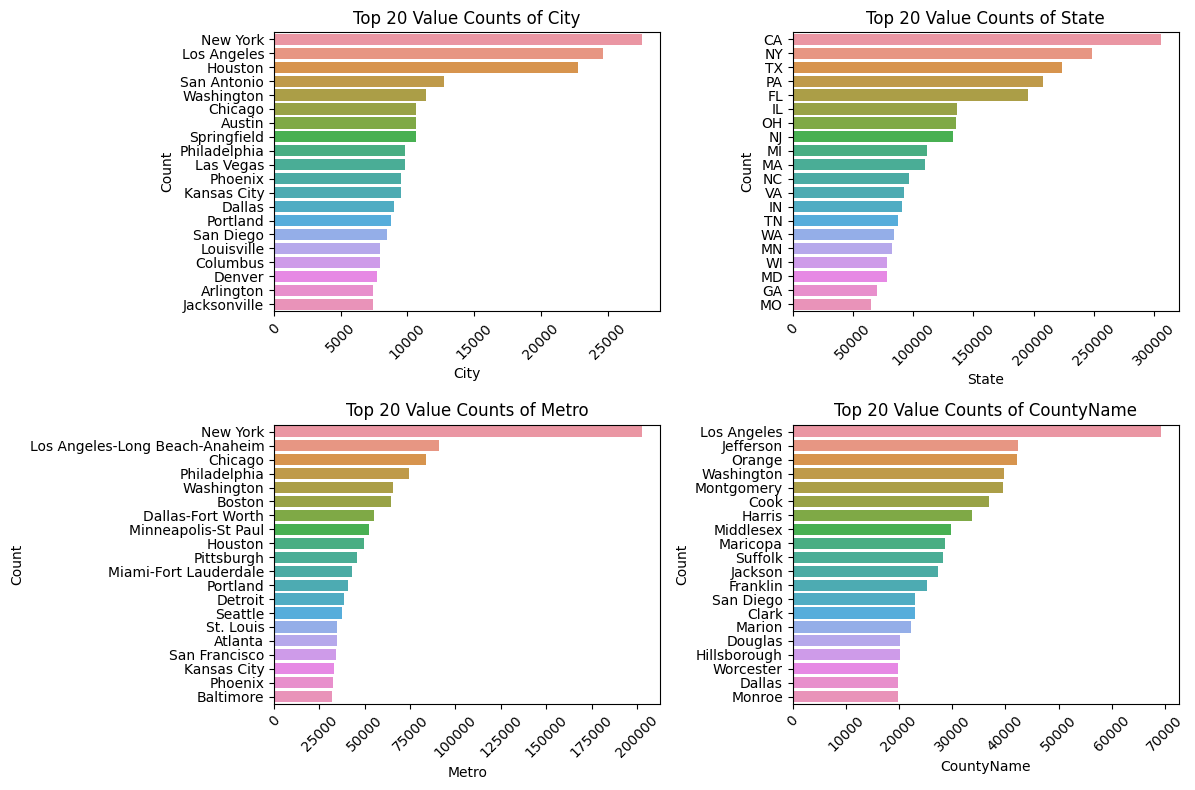

In [24]:
columns_list = ["City","State","Metro","CountyName"]
plot_value_counts(melted_df, columns_list)

The top 5 cities, states metro and counties with the highest number of houses are:
* cities: New York, Los Angeles, Houston, San Antonio and Washington
* states: CA, NY, TX,PA,FL
* metro: New York, Los Angeles, Chicago, Philadelphia, Washington
* counties: Los Angeles,Jefferson, Orange, Washington, Montgomery


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_column_distributions(data, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(num_columns, 2, figsize=(10*2, 6*num_columns))

    for i, column in enumerate(columns):
        ax1 = axes[i, 0]
        ax2 = axes[i, 1]

        # Plot histogram using seaborn
        sns.histplot(data[column], ax=ax1, bins=30, kde=False, edgecolor='black')
        ax1.set_title(f'{column} Distribution (Histogram)', fontsize=16)
        ax1.set_xlabel(column, fontsize=12)
        ax1.set_ylabel('Frequency', fontsize=12)

        # Plot kernel density plot using seaborn
        sns.kdeplot(data[column], ax=ax2, fill=True)
        ax2.set_title(f'{column} Distribution (Kernel Density Plot)', fontsize=16)
        ax2.set_xlabel(column, fontsize=12)
        ax2.set_ylabel('Density', fontsize=12)

    # Adjust the spacing between subplots
    plt.tight_layout()
    plt.show()


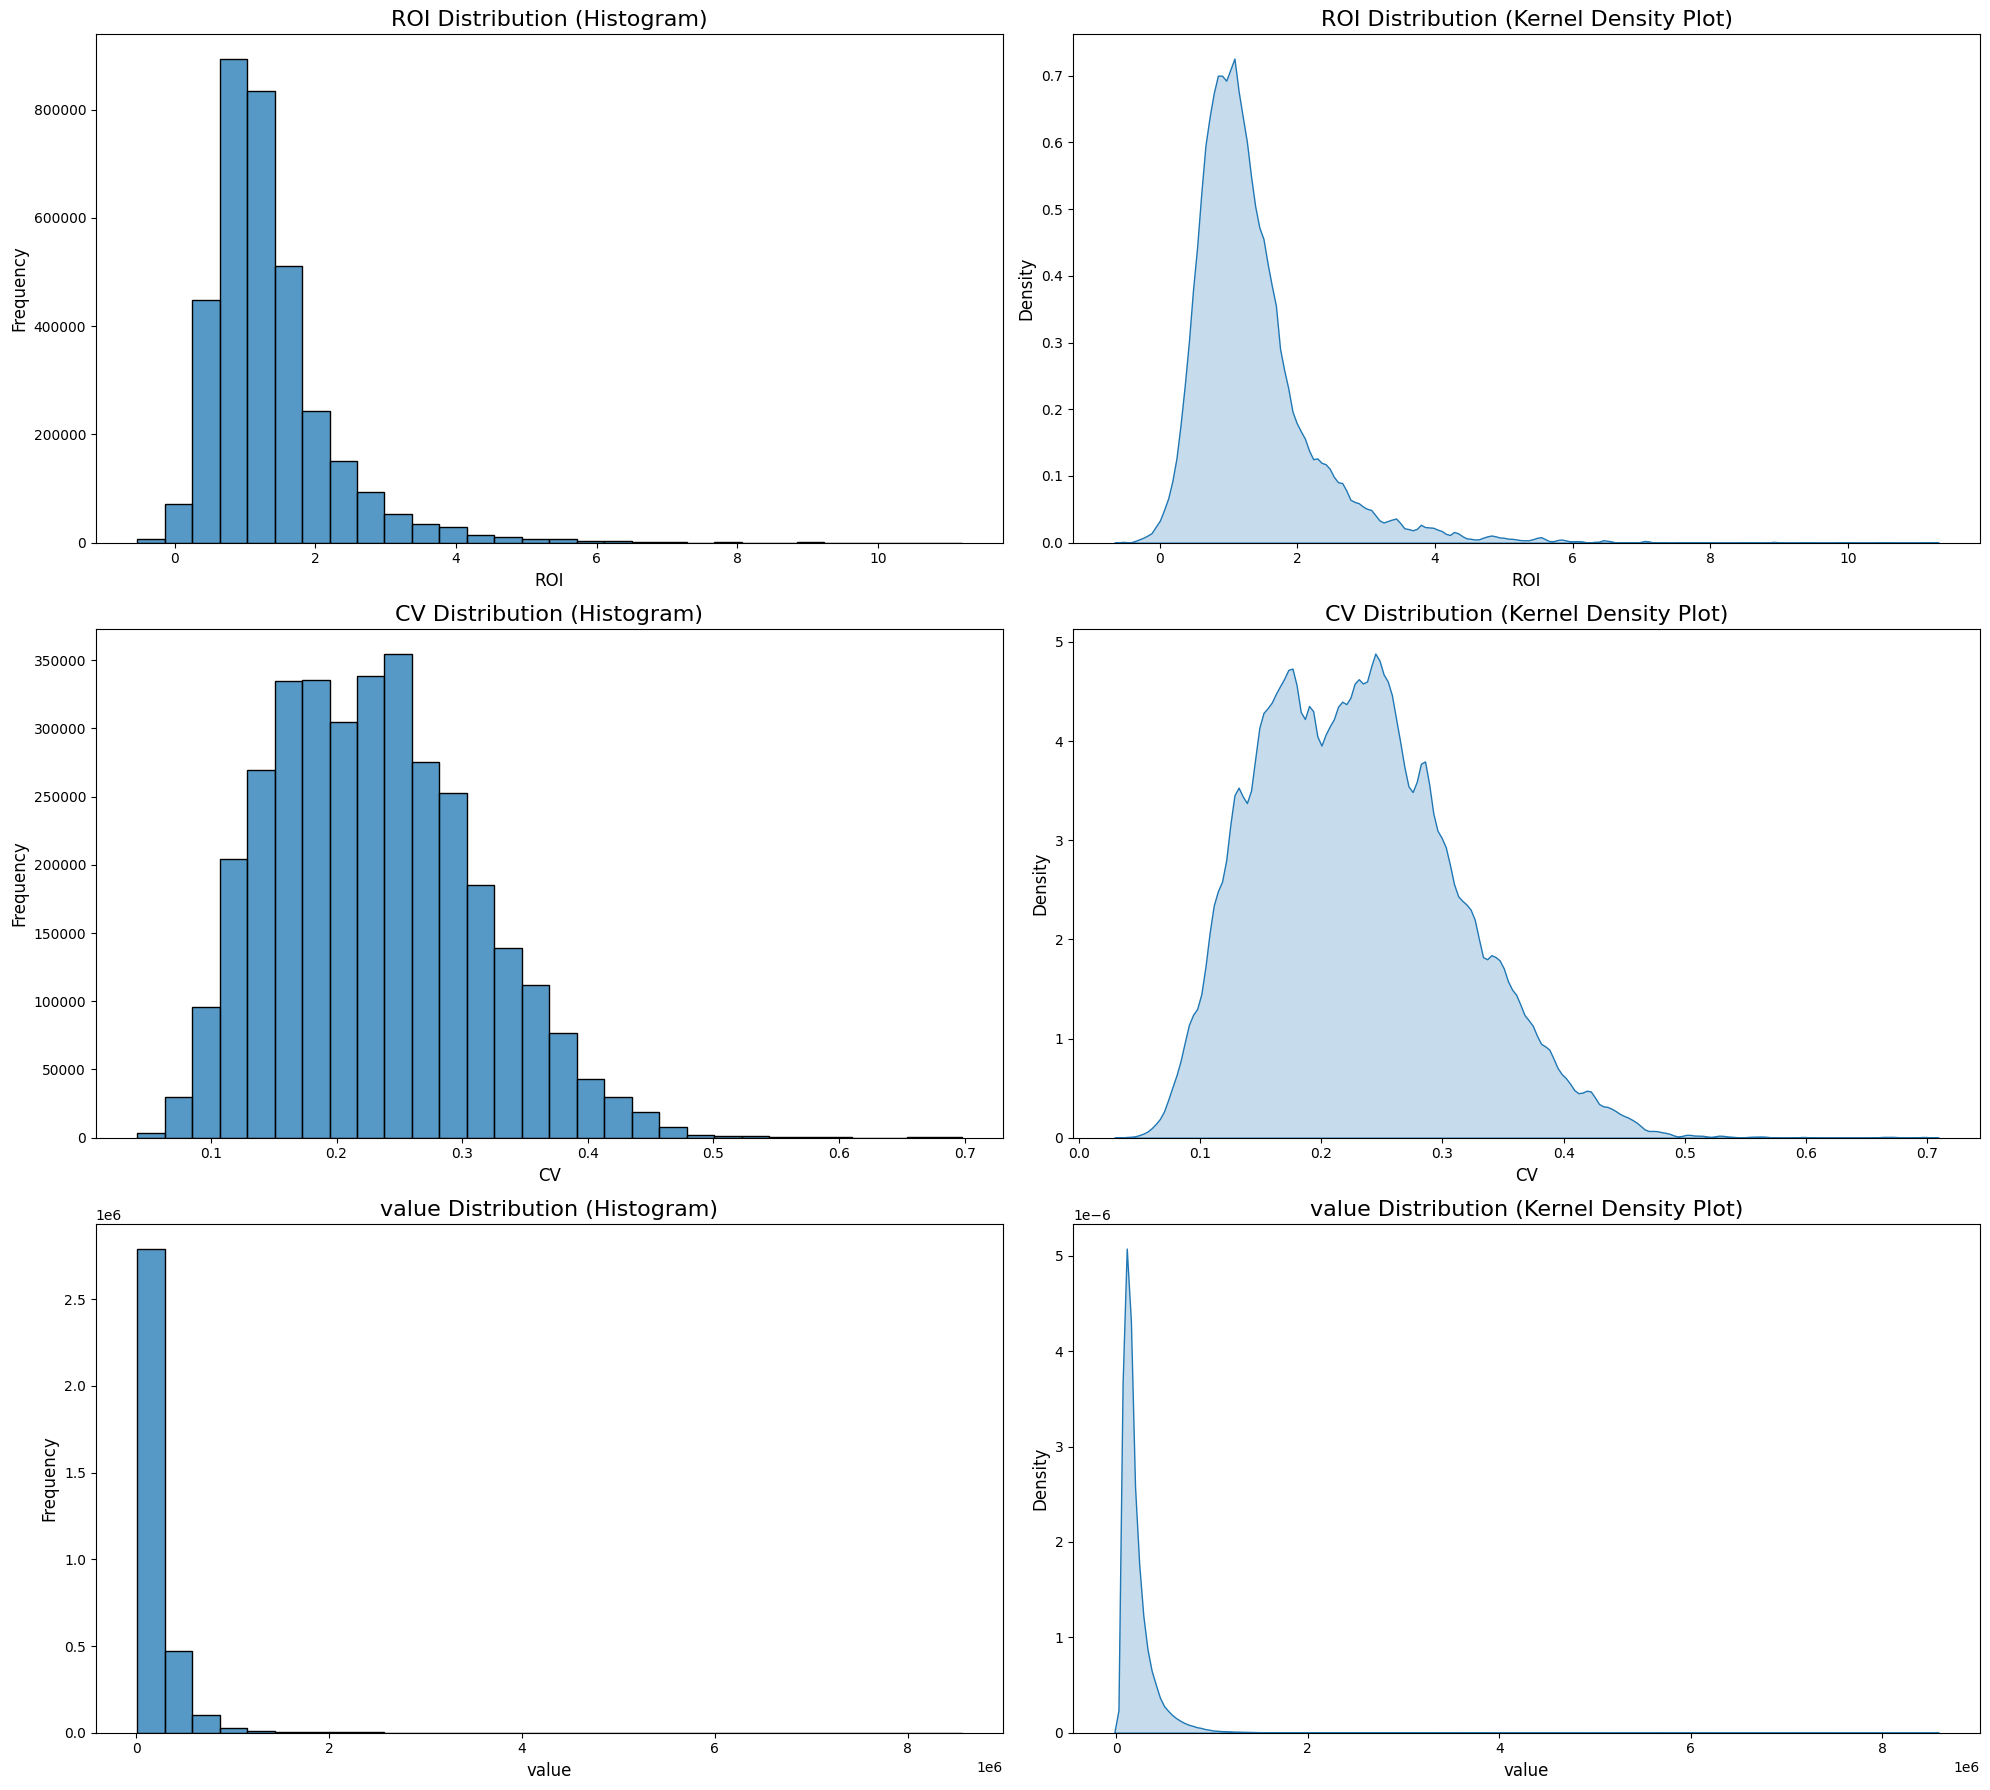

In [26]:
continuous_columns = ['ROI','CV','value']
plot_column_distributions(melted_df, continuous_columns)

> ROI: The distribution is positively skewed.Most of the houses have an ROI between 1% and 2% .It also has a long tail showing that there are outliers, houses with higher ROI impliying higher return.

>Value: The distribution of the house prices is positively skewed showing that most houses are lowly priced and it also has a long tail showing that there are outliers ie the extremely highly priced houses.

> CV:  The plot shows that most of the houses have a cv between 0.1 and 0.3 which shows that their prices are close to the mean thus less risk but it also has a long tail showing that there are outliers, houses with higher cv impliying higher risk.

IQR for RegionID column: 24573.0
Number of outliers in RegionID column: 26765
IQR for SizeRank column: 7192.0
Number of outliers in SizeRank column: 0
IQR for ROI column: 0.8382278397682761
Number of outliers in ROI column: 185500
IQR for CV column: 0.11590466360431909
Number of outliers in CV column: 13780
IQR for value column: 144100.0
Number of outliers in value column: 258901


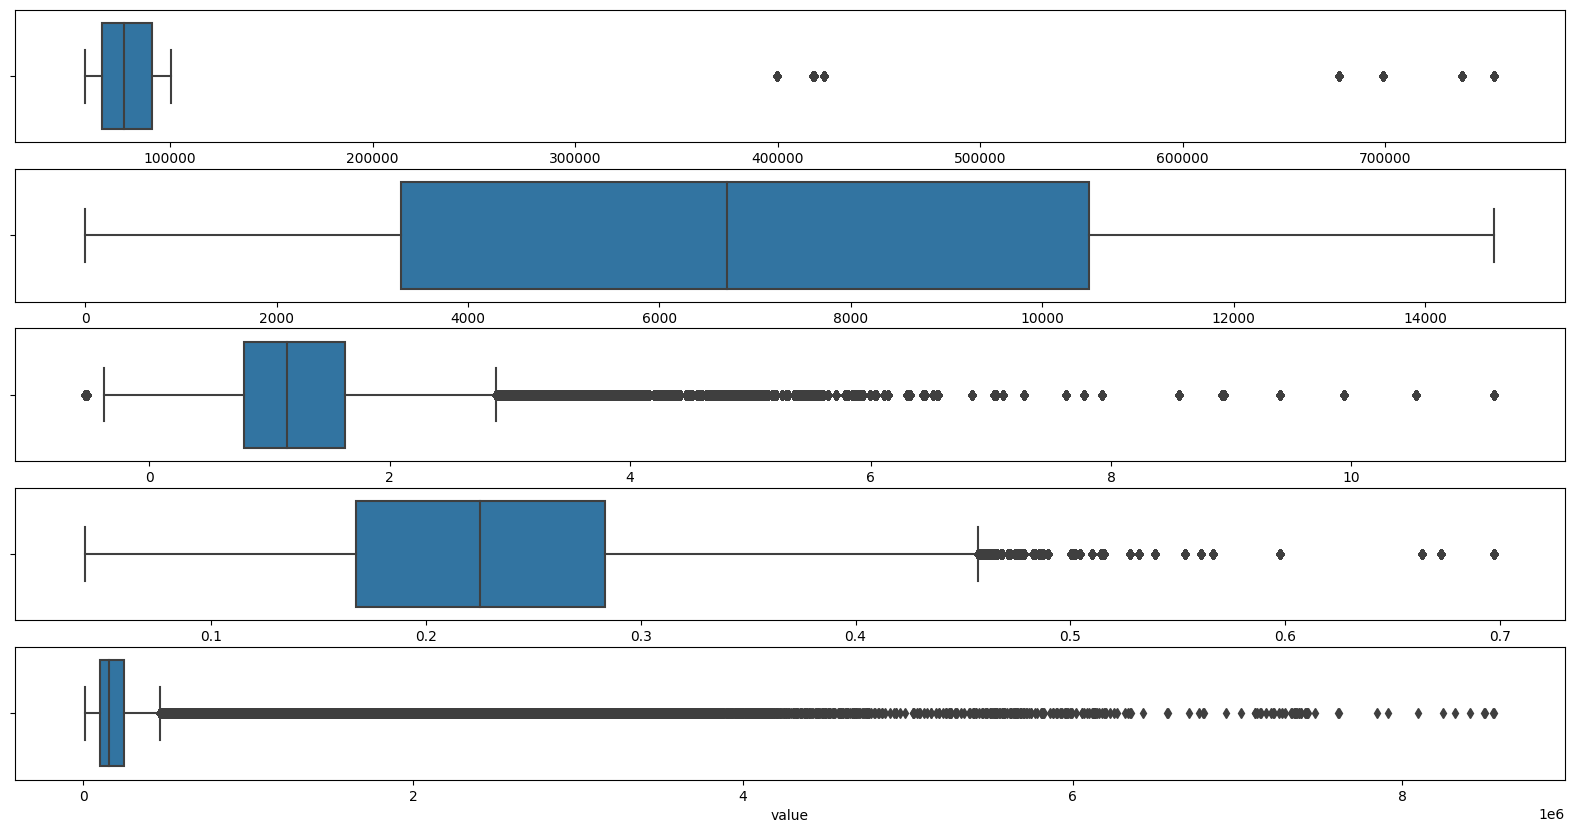

In [27]:
def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,10))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
plt.show()

num=melted_df.select_dtypes('number')
columns=num.columns
check_outliers(melted_df, columns)

The box plots shows that there are outliers in the dataset especially in the prices(value) column which shows there are some houses that are highly priced which might provide useful information for the analysis, thus we won't remove the outliers.

### 4.2 Bivariate Analysis

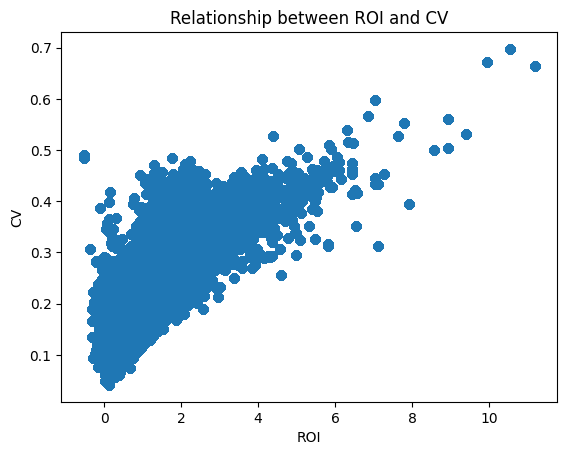

In [28]:
def scatter_plot(x,y, x_label, y_label):
  plt.scatter(x,y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(f'Relationship between {x_label} and {y_label}')
  plt.show();

scatter_plot(melted_df['ROI'],melted_df['CV'],'ROI','CV')

The plot shows the relationship between the return on investment and the coefficient of variation. It shows that the two have a strong positive relationship, that is, that increase in CV leads to increase in ROI and vice versa. This implies that the higher the risk, the higher the return.

Since the two have such a strong relationship, findings using ROI will be similar to those using CV . Let's examine how the other variables are related to ROI.

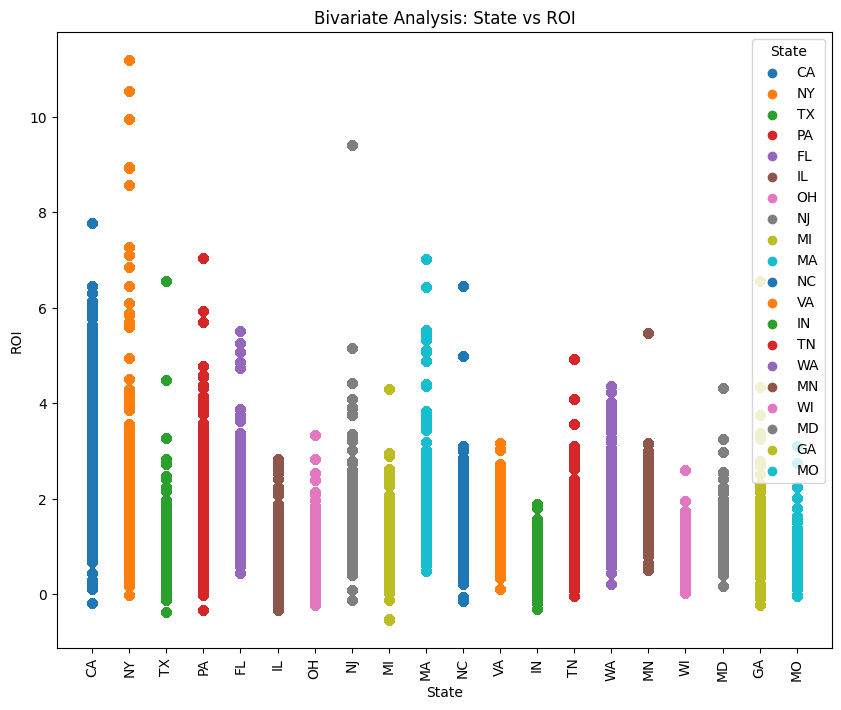

In [29]:
def plot_bivariate_analysis(data, x_column, y_column, top_n=20):

    top_categories = data[x_column].value_counts().nlargest(top_n).index
    data_top = data[data[x_column].isin(top_categories)]

    plt.figure(figsize=(10, 8))
    for category in top_categories:
        category_data = data_top[data_top[x_column] == category]
        plt.scatter(category_data[x_column], category_data[y_column], label=category)

    plt.title(f'Bivariate Analysis: {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=90)
    plt.legend(title=x_column)
plt.show()
plot_bivariate_analysis(melted_df, 'State', 'ROI')

The above plot shows that the state with the highest return on investment is NY.

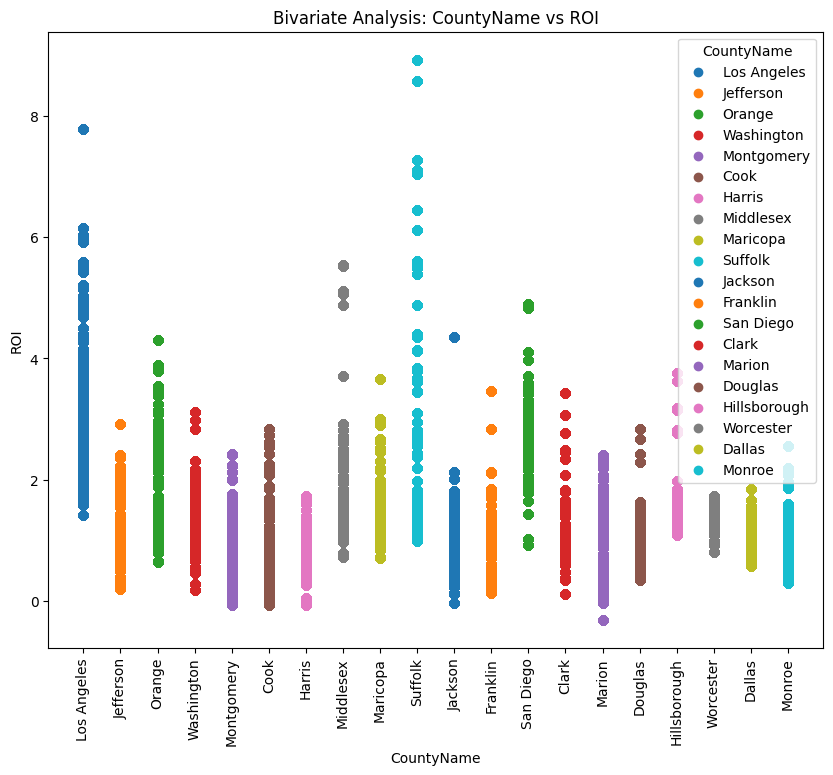

In [30]:
plot_bivariate_analysis(melted_df, 'CountyName', 'ROI')


The county with the highest ROI is Suffolk.

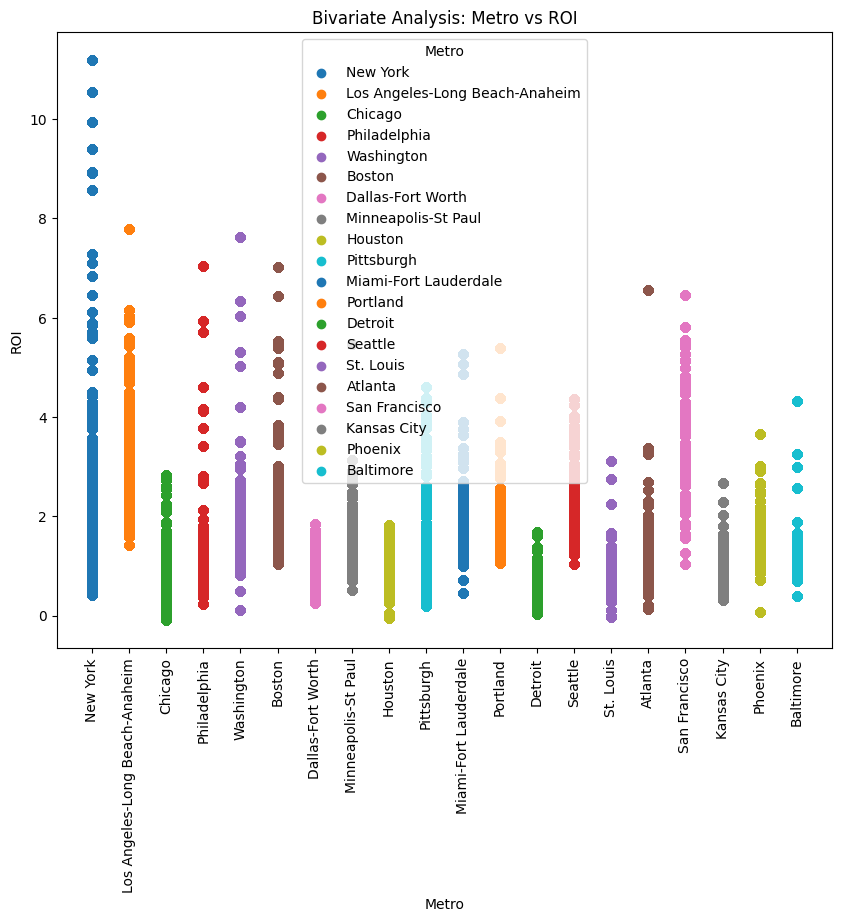

In [31]:
plot_bivariate_analysis(melted_df, 'Metro', 'ROI')

The metro with the highest ROI is New york.

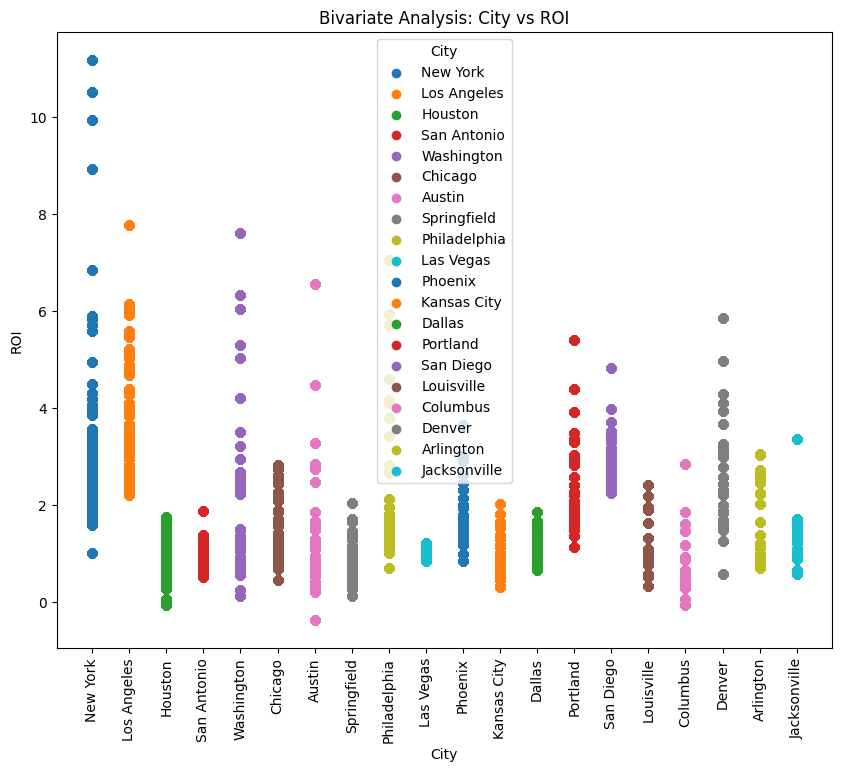

In [32]:
plot_bivariate_analysis(melted_df, 'City', 'ROI')

The city with the highest ROI is NewYork. From the above analysis, we can conclude that properties in NewYork have the highest  return on investment.
Let's analyse the cities, states, metro and counties that have the highest ROI(return) but lowest CV(risk).

In [33]:
def get_top_rows(data, cv_column, roi_column, value_column, num_rows=10000):
    # Sort the DataFrame based on the value column in descending order,
    # coefficient of variance column in ascending order,
    # and return on investment column in descending order
    sorted_data = data.sort_values([value_column, cv_column, roi_column], ascending=[False, True, False])
    # Get the top N rows
    top_rows = sorted_data.head(num_rows)
    return top_rows# Usage example
top_rows = get_top_rows(melted_df, 'CV', 'ROI', 'value', num_rows=10000)


In [34]:
top_rows

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
2991660,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-08-01,8558700.0
2978765,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-07-01,8550800.0
2965870,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-06-01,8501900.0
3004555,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-09-01,8497000.0
2952975,10128,61703,22,New York,NY,New York,New York,1.009030,0.289101,2015-05-01,8412600.0
...,...,...,...,...,...,...,...,...,...,...,...
3037046,94507,97715,7000,Alamo,CA,San Francisco,Contra Costa,3.871755,0.325965,2015-11-01,1690000.0
1470900,92037,96602,893,San Diego,CA,San Diego,San Diego,3.410964,0.338853,2005-10-01,1690000.0
3345414,94127,97581,5798,San Francisco,CA,San Francisco,San Francisco,4.228665,0.379145,2017-11-01,1690000.0
2111515,11024,61986,10436,Great Neck,NY,New York,Nassau,2.117189,0.289201,2009-11-01,1689900.0


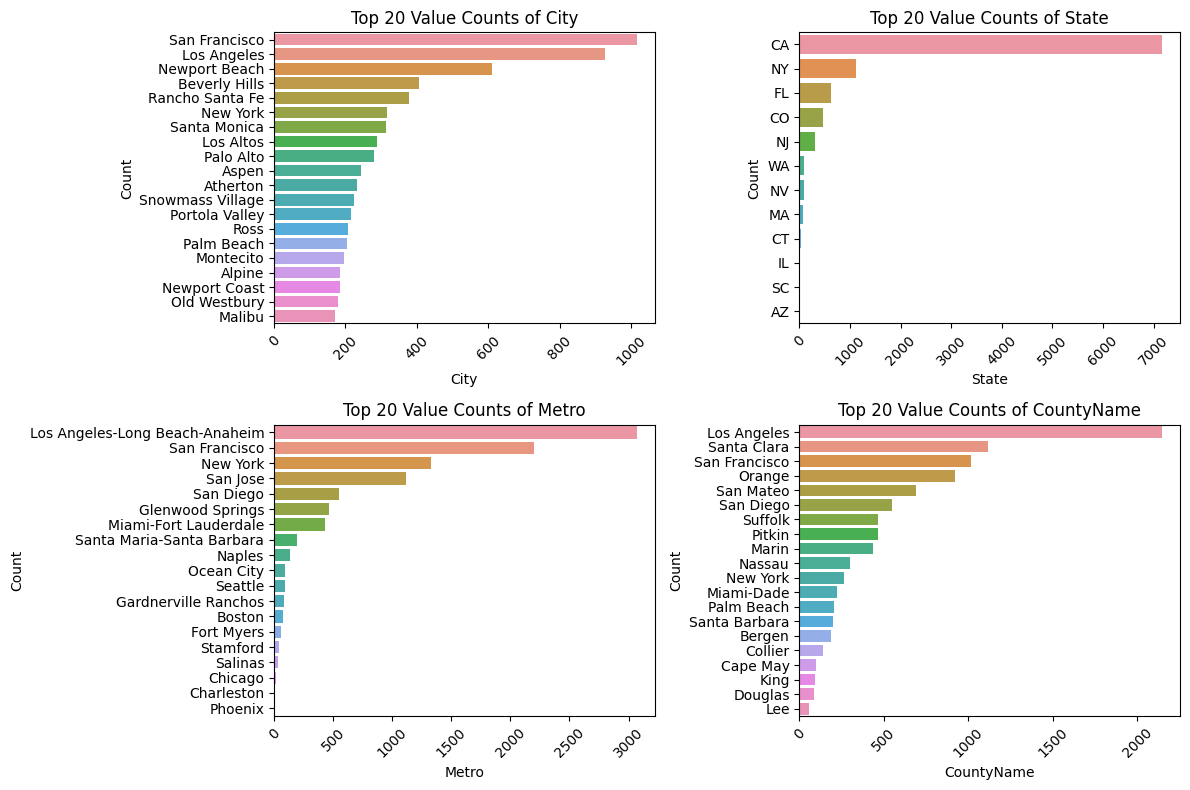

In [35]:
plot_value_counts(top_rows, columns_list)

The top 5 cities, states metro and counties with the highest return and lowest risk are:

* cities: San Fransisco, Los Angeles, Newport beach, Beverly Hills and Rancho Santa Fe
* states: CA, NY,FL, CO, NJ
* metro: Los Angeles,San Fransisco,New York, San Jose, San Diego
* counties: Los Angeles,Santa Clara, San Fransisco, Orange, San Mateo

### Multivariate Analysis

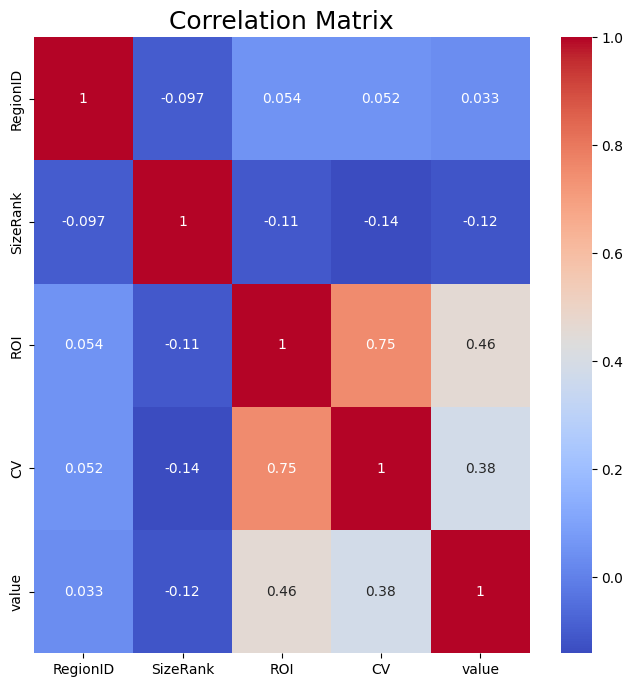

In [36]:
corr_matrix = melted_df.corr()
fig, ax = plt.subplots(figsize=(8,8))

# Set the figure size to 12 inches by 12 inches
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show();


From the heat map, we can observe that most of the features exhibit weak relationships with each other, except for ROI and CV, which display a strong relationship.